In [5]:
# 문제. 500명의 키와 몸무게, 비만도 라벨을 이용해 비만을 판단하는 모델을 만들어보자
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [6]:
# 1. bmi데이터 가져오기(카톡방의 csv파일)
df = pd.read_csv('./bmi_500.csv', index_col='Label')
print(df.head(), df.index.unique())

            Gender  Height  Weight
Label                             
Obesity       Male     174      96
Normal        Male     189      87
Obesity     Female     185     110
Overweight  Female     195     104
Overweight    Male     149      61 Index(['Obesity', 'Normal', 'Overweight', 'Extreme Obesity', 'Weak',
       'Extremely Weak'],
      dtype='object', name='Label')


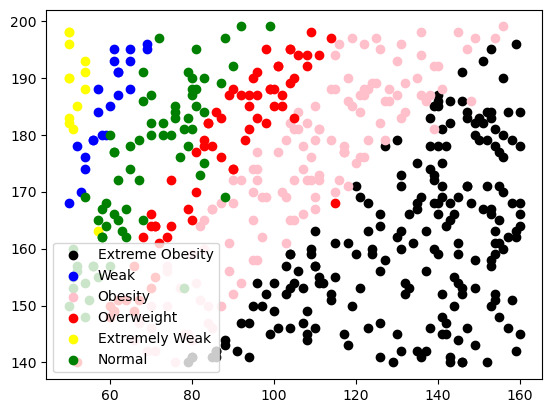

In [7]:
# 2. 데이터 시각화하기
def scatter(label, color):
    t = df.loc[label]
    plt.scatter(t['Weight'], t['Height'], color=color, label=label)

scatter('Extreme Obesity', 'black')
scatter('Weak', 'blue')
scatter('Obesity', 'pink')
scatter('Overweight', 'red')
scatter('Extremely Weak', 'yellow')
scatter('Normal', 'green')

plt.legend()
plt.show()

In [8]:
# 3. 모델링 학습 및 평가 후 예측하기(이웃의 수는 10으로 설정)
df = pd.read_csv('./bmi_500.csv')

X = df.loc[:, 'Height' : 'Weight']
y = df.loc[:, 'Label']

X_train = X.iloc[:350, :]
X_test = X.iloc[350:, :]
y_train = y.iloc[:350]
y_test = y.iloc[350:]

model = KNeighborsClassifier(n_neighbors=10)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
res = metrics.accuracy_score(y_test, y_pred)
print(res)

0.94


In [9]:
# 4. 원하는 값 입력해보기(키, 몸무게)
model.predict([[176,50]])

c:\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Weak'], dtype=object)